## Dataset Preparation - Jan-June 2022:

In [1]:
#Importations of libraries needed:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
#Import dataset as dataframe:
df = pd.read_csv('/Users/alexodonnell/Documents/AOD/College/FYP/Datasets/TrafficFlow/Traffic_Flow_Data_June_to_December_2022_SDCC.csv')
print("The data contains {0} rows and {1} columns".format(df.shape[0], df.shape[1]))
df.head(20)

The data contains 1048575 rows and 16 columns


,site,day,date,start_time,end_time,flow,flow_pc,stops,stops_pc,del,del_pc,cong,cong_pc,dsat,dsat_pc,ObjectId
0,N01111A,WE,01/06/2022,2023/05/03 23:00:00+00,00:15,78,100,13,100,0.0,100,0,100,5,106,1
1,N01111A,FR,03/06/2022,2023/05/04 01:00:00+00,02:15,14,100,0,100,0.0,100,0,100,1,98,2
2,N01111A,SA,04/06/2022,2023/05/04 02:00:00+00,03:15,32,100,6,100,0.0,100,0,100,2,105,3
3,N01111A,WE,01/06/2022,2023/05/03 23:15:00+00,00:30,38,100,17,100,0.1,100,0,100,2,98,4
4,N01111A,SA,04/06/2022,2023/05/04 02:15:00+00,03:30,37,100,13,100,0.0,100,0,100,2,98,5
5,N01111A,FR,03/06/2022,2023/05/04 01:15:00+00,02:30,19,100,6,100,0.0,100,0,100,1,106,6
6,N01111A,WE,01/06/2022,2023/05/03 23:30:00+00,00:45,40,100,7,100,0.0,100,0,100,2,98,7
7,N01111A,SA,04/06/2022,2023/05/04 02:30:00+00,03:45,30,100,9,100,0.0,100,0,100,2,102,8
8,N01111A,FR,03/06/2022,2023/05/04 01:30:00+00,02:45,12,100,0,100,0.0,100,0,100,1,101,9
9,N01111A,WE,01/06/2022,2023/05/03 23:45:00+00,01:00,12,100,2,100,0.0,100,0,100,1,99,10


##### First we need to identify potential data quality issues, and then propose solutions for each
##### Potential data quality issues: `Duplicates`, `Datatypes`, `Missing Data` and `Outliers`

#### `Duplicates`:

In [3]:
df[df.duplicated()].shape[0]

0

#### `Datatypes`:

In [4]:
df.dtypes

site           object
day            object
date           object
start_time     object
end_time       object
flow            int64
flow_pc         int64
stops           int64
stops_pc        int64
del           float64
del_pc          int64
cong            int64
cong_pc         int64
dsat            int64
dsat_pc         int64
ObjectId        int64
dtype: object

##### We can see that all categorical data is represented by the `object` class, and all numerical data is represetned by the `int64` class, which is fine for now. We may need to make slight adjustments later

#### `Missing data`:

In [5]:
print("The number of missing values in the whole dataset is {0}".format(df.isnull().sum().sum()))
print("The percentage of entries with missing data in each column is:")
100 * (df.isnull().sum()/df.shape[0])

The number of missing values in the whole dataset is 0
The percentage of entries with missing data in each column is:


site          0.0
day           0.0
date          0.0
start_time    0.0
end_time      0.0
flow          0.0
flow_pc       0.0
stops         0.0
stops_pc      0.0
del           0.0
del_pc        0.0
cong          0.0
cong_pc       0.0
dsat          0.0
dsat_pc       0.0
ObjectId      0.0
dtype: float64

##### As we can see, thankfully this dataset contains no missing data, so there is no need for any imputation or deletion etc
#
#
#

#### `Outliers`:

#### Deciding how to treat outliers in our dataset depends on various factors, including the nature of your data, the goals of our analysis, and the reasons behind the presence of outliers.

### Consider the Nature of the Data:

1. **Understanding Outliers:**
   - Consider whether the outliers are genuine data points or if they are the result of errors, data entry mistakes, or measurement errors. Genuine extreme values might carry important information.

2. **Data Distribution:**
   - Assess the overall distribution of the data. If the data is non-parametric or exhibits heavy tails, outliers might be a natural part of the distribution.

### Consider the Analysis Goals:

1. **Impact on Results:**
   - Evaluate how the presence of outliers affects the results of the analysis. Outliers can significantly impact measures like mean and standard deviation, so removing them may alter the interpretation of the data.

2. **Model Assumptions:**
   - If we are going to be fitting statistical models, check if the assumptions of the models are violated by the presence of outliers. Some models assume a normal distribution, and outliers might affect the model's performance.

### Outlier Handling Strategies:

1. **Transformation:**
   - We should consider transforming the data (e.g., log transformation) to make the distribution more normal, reducing the impact of outliers without removing them.

2. **Winsorizing:**
   - Apply winsorizing to cap extreme values by replacing them with values at a specified percentile. This can mitigate the impact of outliers while retaining the information they provide.

3. **Imputation:**
   - If the outliers are due to data entry errors, consider imputing them with more reasonable values rather than removing them.

### Impact on Sample Size:

1. **Sample Size:**
   - Removing outliers reduces the size of the dataset. Consider the impact of this reduction on the statistical power of your analysis.

2. **Representativeness:**
   - Ensure that the remaining dataset is still representative of the population we are studying after removing outliers.

### Consult with Domain Experts:

1. **Domain Knowledge:**
   - Consult with experts in the field related to the data, in this case traffic congestion. They may provide insights into whether certain values are plausible or whether outliers should be retained.

### Robust Statistical Methods:

1. **Use Robust Measures:**
   - Utilize robust statistical measures (e.g., median instead of mean) that are less sensitive to outliers.

### Document My Decision:

1. **Documentation:**
   - It is important to clearly document the reasons behind my decision to either keep or remove outliers. This documentation is crucial for transparency and reproducibility.

#### In summary, the decision to remove outliers depends on a careful consideration of the characteristics of the data, the goals of my analysis, and the potential impact on the final results. It's often beneficial to explore multiple strategies, document decisions, and be aware of the implications of outlier handling on the validity of my analysis.

#### Box Plots

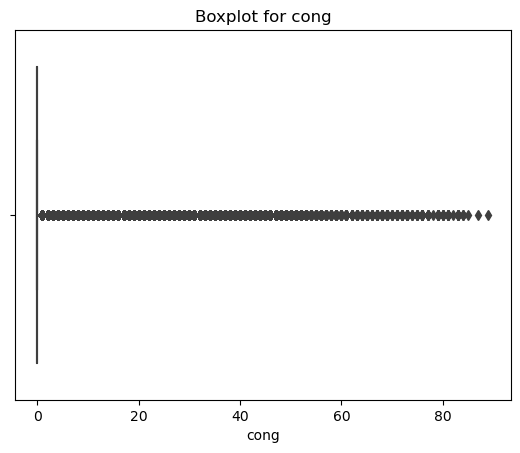

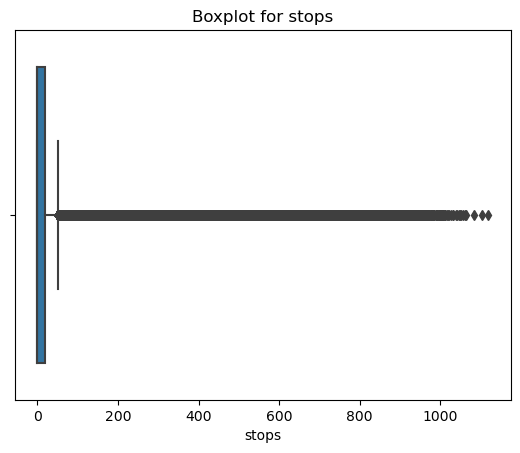

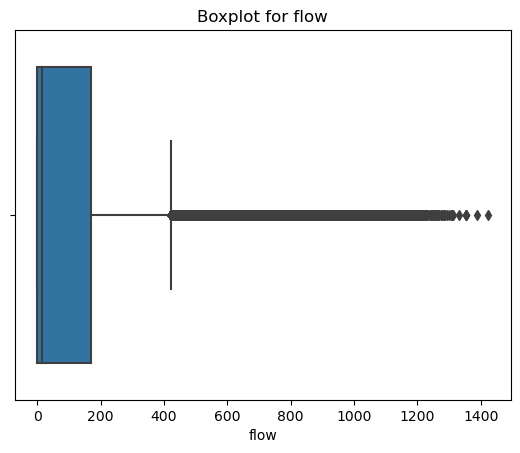

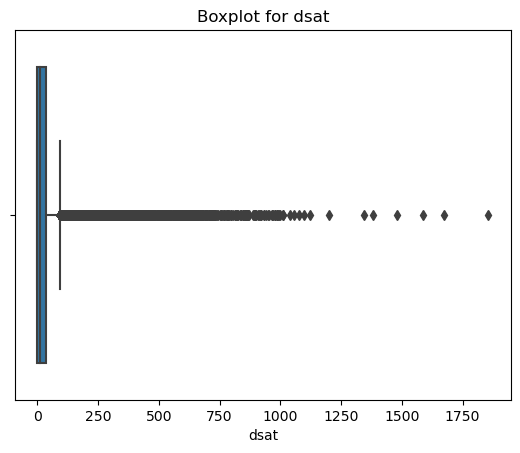

In [6]:
selected_columns = {'flow', 'cong', 'dsat', 'stops', 'del'} #Only relevant columns to check for outliers in
# Iterate through relevant columns
for column_name in selected_columns:
    # Check if the column data type is int64
    if df[column_name].dtype == 'int64':
        # Create a boxplot for the column
        sns.boxplot(x=df[column_name])
        plt.title(f'Boxplot for {column_name}')
        plt.show()

#### Scatter Plots

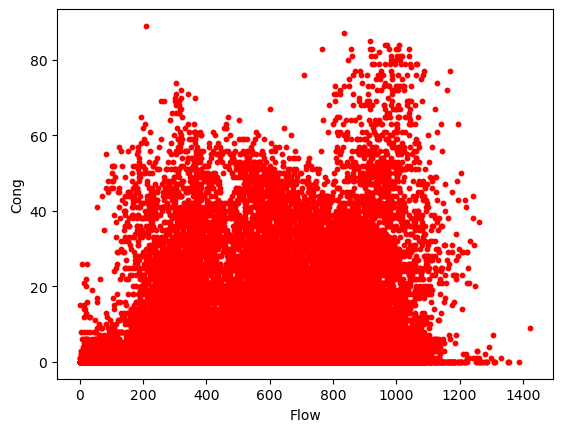

In [12]:
plt.scatter(df['flow'], df['cong'], color='red', s=10)
plt.xlabel('Flow')
plt.ylabel('Cong')
plt.show()

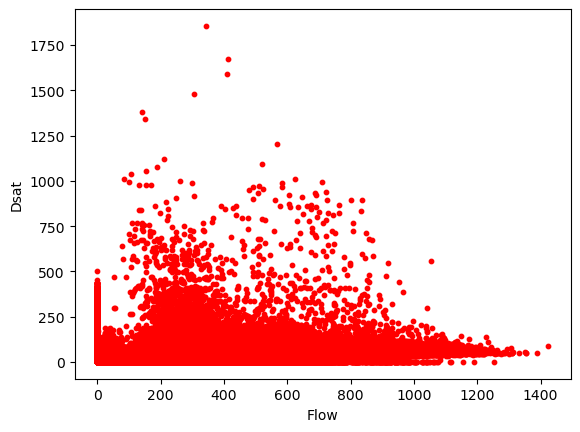

In [13]:
plt.scatter(df['flow'], df['dsat'], color='red', s=10)
plt.xlabel('Flow')
plt.ylabel('Dsat')
plt.show()

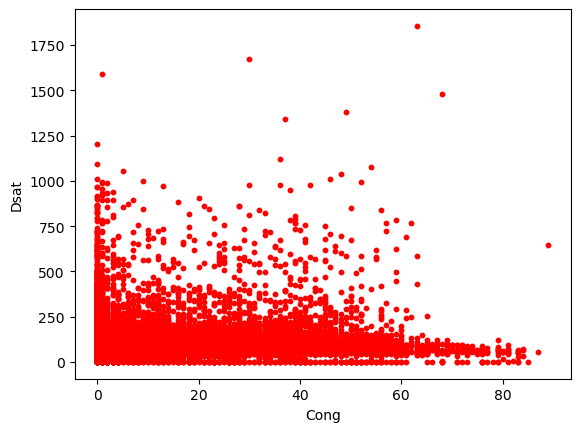

In [14]:
plt.scatter(df['cong'], df['dsat'], color='red', s=10)
plt.xlabel('Cong')
plt.ylabel('Dsat')
plt.show()

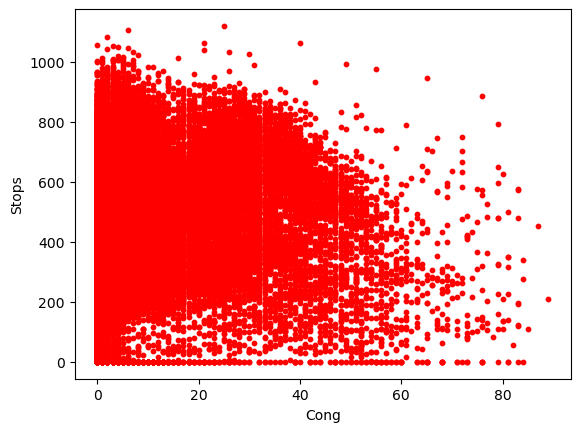

In [15]:
plt.scatter(df['cong'], df['stops'], color='red', s=10)
plt.xlabel('Cong')
plt.ylabel('Stops')
plt.show()

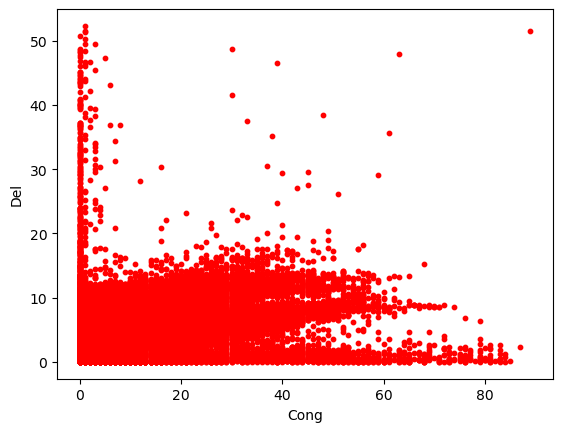

In [16]:
plt.scatter(df['cong'], df['del'], color='red', s=10)
plt.xlabel('Cong')
plt.ylabel('Del')
plt.show()

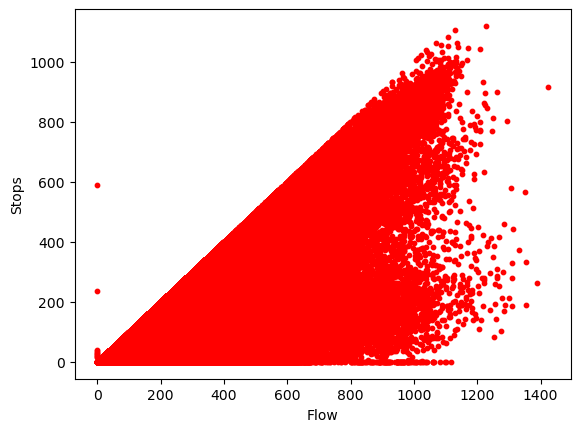

In [17]:
plt.scatter(df['flow'], df['stops'], color='red', s=10)
plt.xlabel('Flow')
plt.ylabel('Stops')
plt.show()

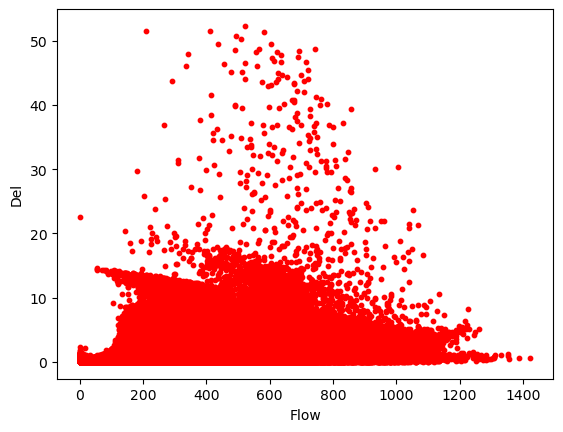

In [18]:
plt.scatter(df['flow'], df['del'], color='red', s=10)
plt.xlabel('Flow')
plt.ylabel('Del')
plt.show()

#### Distribution

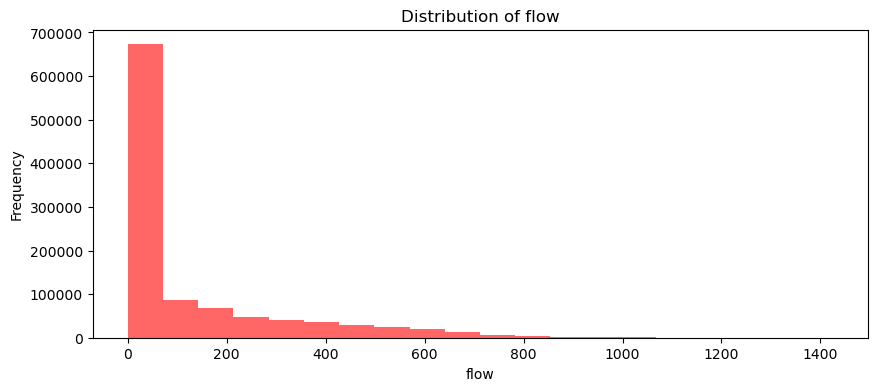

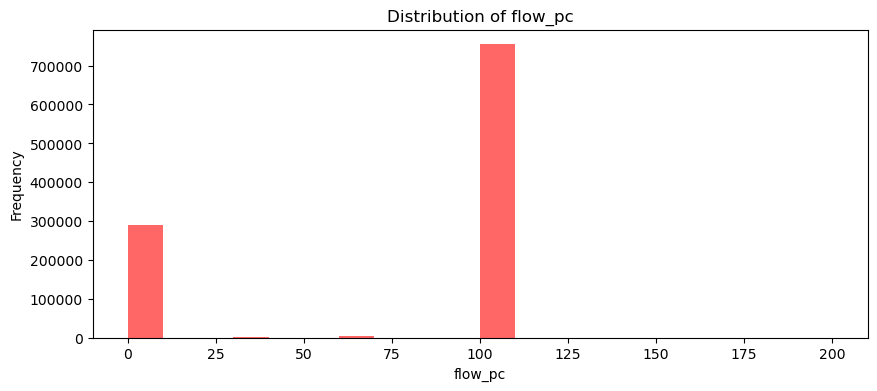

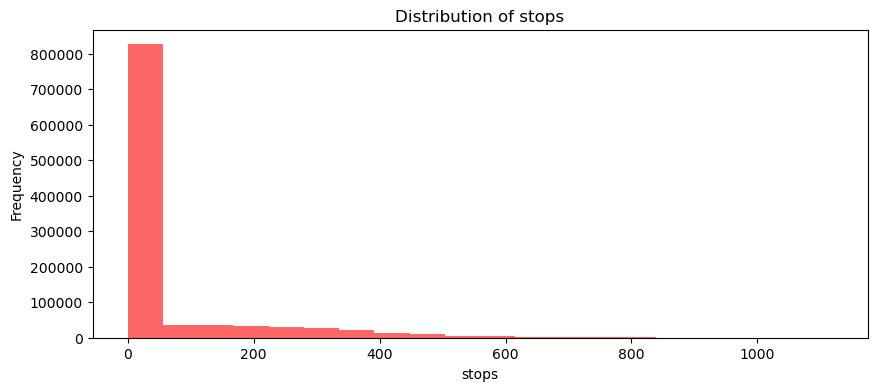

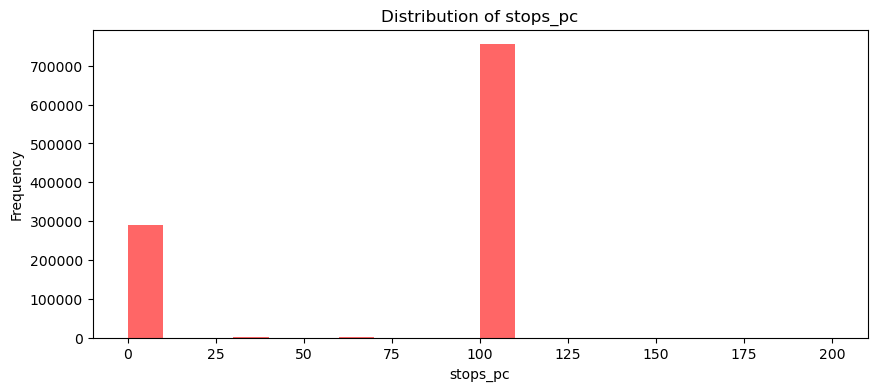

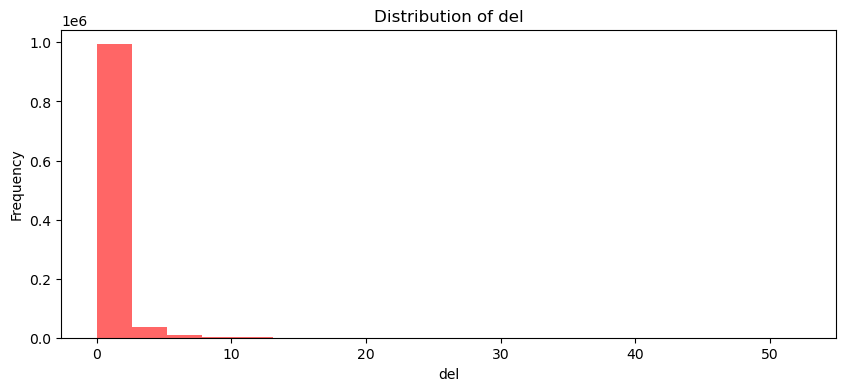

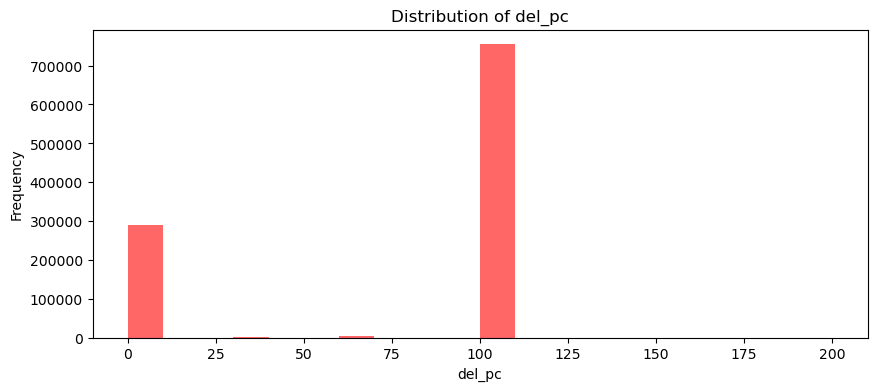

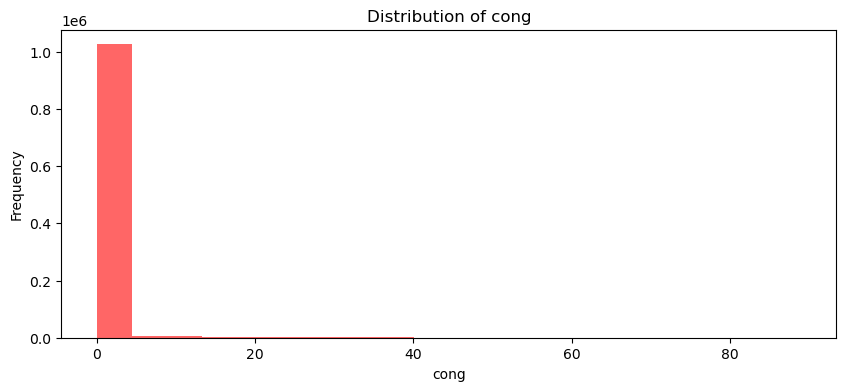

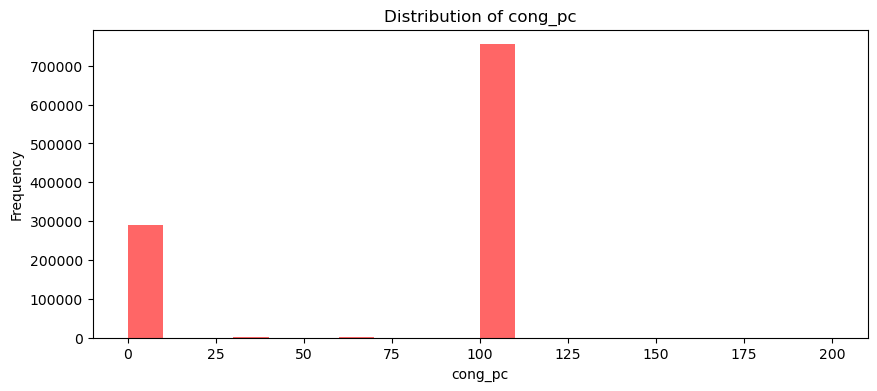

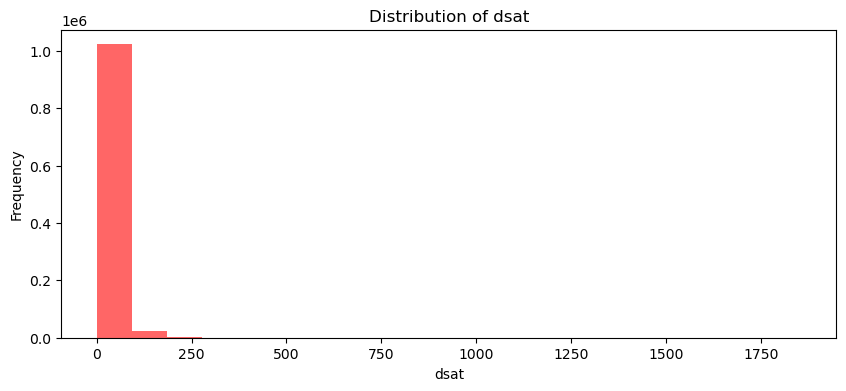

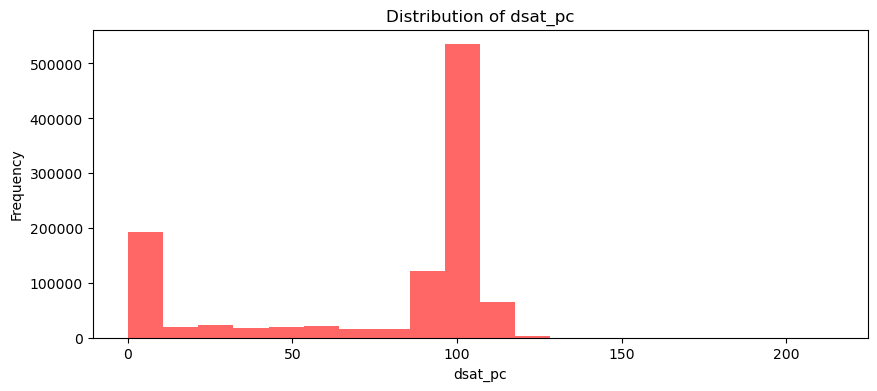

In [25]:
numeric_cols = df.select_dtypes(include='number').columns
numeric_cols = [col for col in numeric_cols if col != 'ObjectId']
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    plt.hist(df[col], bins=20, color='r', alpha=0.6)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.show()

#### Descriptive Statistics

In [19]:
# Filter columns of type int64
int64_columns = df.select_dtypes(include='int64').columns

# Print the describe for each int64 column
for column in int64_columns:
    print(df[column].describe())

count    1.048575e+06
mean     1.194661e+02
std      1.908499e+02
min      0.000000e+00
25%      0.000000e+00
50%      1.600000e+01
75%      1.690000e+02
max      1.424000e+03
Name: flow, dtype: float64
count    1.048575e+06
mean     7.226639e+01
std      4.469936e+01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+02
75%      1.000000e+02
max      2.000000e+02
Name: flow_pc, dtype: float64
count    1.048575e+06
mean     5.774843e+01
std      1.281622e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.000000e+01
max      1.119000e+03
Name: stops, dtype: float64
count    1.048575e+06
mean     7.226836e+01
std      4.469830e+01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+02
75%      1.000000e+02
max      2.000000e+02
Name: stops_pc, dtype: float64
count    1.048575e+06
mean     7.226639e+01
std      4.469936e+01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+02
75%      1.000000e+02
max      2.000000e+02
Name

In [26]:
df.describe()

,flow,flow_pc,stops,stops_pc,del,del_pc,cong,cong_pc,dsat,dsat_pc,ObjectId
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.194661e+02,7.226639e+01,5.774843e+01,7.226836e+01,4.418675e-01,7.226639e+01,4.498486e-01,7.226639e+01,2.277681e+01,7.505940e+01,5.242880e+05
std,1.908499e+02,4.469936e+01,1.281622e+02,4.469830e+01,1.382665e+00,4.469936e+01,3.217067e+00,4.469936e+01,3.227719e+01,4.034322e+01,3.026977e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.800000e+01,2.621445e+05
50%,1.600000e+01,1.000000e+02,0.000000e+00,1.000000e+02,0.000000e+00,1.000000e+02,0.000000e+00,1.000000e+02,9.000000e+00,9.800000e+01,5.242880e+05
75%,1.690000e+02,1.000000e+02,2.000000e+01,1.000000e+02,0.000000e+00,1.000000e+02,0.000000e+00,1.000000e+02,3.700000e+01,1.010000e+02,7.864315e+05
max,1.424000e+03,2.000000e+02,1.119000e+03,2.000000e+02,5.230000e+01,2.000000e+02,8.900000e+01,2.000000e+02,1.856000e+03,2.140000e+02,1.048575e+06


#### Z Score

In [20]:
# Filter numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Array to store the number of outliers for each column
outliers_count = []

# Identify outliers for each numeric column
for column in numeric_columns:
    z_scores = zscore(df[column])
    outliers = (z_scores > 3) | (z_scores < -3)

    # Store the number of outliers for the current column
    outliers_count.append((column, outliers.sum()))
    
    print(f"Outliers for {column}:")
    print(df[outliers][column])
    print("\n")

# Print or use the outliers_count array as needed
print("Number of outliers for each column:")
print(outliers_count)

Outliers for flow:
131        773
132        735
164        763
167        758
182        729
          ... 
1048570    746
1048571    880
1048572    842
1048573    833
1048574    899
Name: flow, Length: 19139, dtype: int64


Outliers for flow_pc:
Series([], Name: flow_pc, dtype: int64)


Outliers for stops:
175        453
2115       478
2863       463
5840       457
7598       512
          ... 
1045787    443
1045788    444
1046521    540
1046614    460
1046940    455
Name: stops, Length: 26941, dtype: int64


Outliers for stops_pc:
Series([], Name: stops_pc, dtype: int64)


Outliers for del:
19626      6.4
19662      8.8
19663      7.9
19772     10.0
19818     14.1
          ... 
985082     5.6
985083     6.4
985085     4.7
985086     4.6
985088     4.8
Name: del, Length: 23045, dtype: float64


Outliers for del_pc:
Series([], Name: del_pc, dtype: int64)


Outliers for cong:
167       19
8093      17
14001     12
15083     20
16716     36
          ..
984829    43
984830    38
98483

#### There are many outliers in `flow` (19610), `cong` (13807) and `dsat` (9075). Lets check if any of these outliers overlap

In [21]:
# Create a DataFrame with only the rows that are outliers in any column
outliers_df = df[df[numeric_columns].isin(outliers).any(axis=1)]

# Check for duplicate rows in the outliers DataFrame
duplicate_outliers = outliers_df[outliers_df.duplicated()]

# Print or use the duplicate_outliers DataFrame as needed
print("Duplicate outliers:")
print(duplicate_outliers)

Duplicate outliers:
Empty DataFrame
Columns: [site, day, date, start_time, end_time, flow, flow_pc, stops, stops_pc, del, del_pc, cong, cong_pc, dsat, dsat_pc, ObjectId]
Index: []


#### It seems that there are no duplicate outliers, meaning that each row identified as an outlier is unique and doesn't appear as an outlier in more than one column. This is a good sign, as it suggests that the outliers identified in different columns are distinct and not overlapping. 

#### If there were rows in the `duplicate_outliers` DataFrame, it would indicate that those specific data points are outliers in multiple columns. The fact that the DataFrame is empty suggests that each row is an outlier in only one of the columns considered for outlier detection

#
#
#
#
#
#

## Correlation

#### Now let us view the correlation between each numerical feature in the dataset using a heat map to allow us to identify the relationships between each feature. Heatmaps are particularly useful for correlation analysis, idetifying patterns and trends, feature comparison, identifying outliers, easy interpretation, especially for larger datasets, which ours is

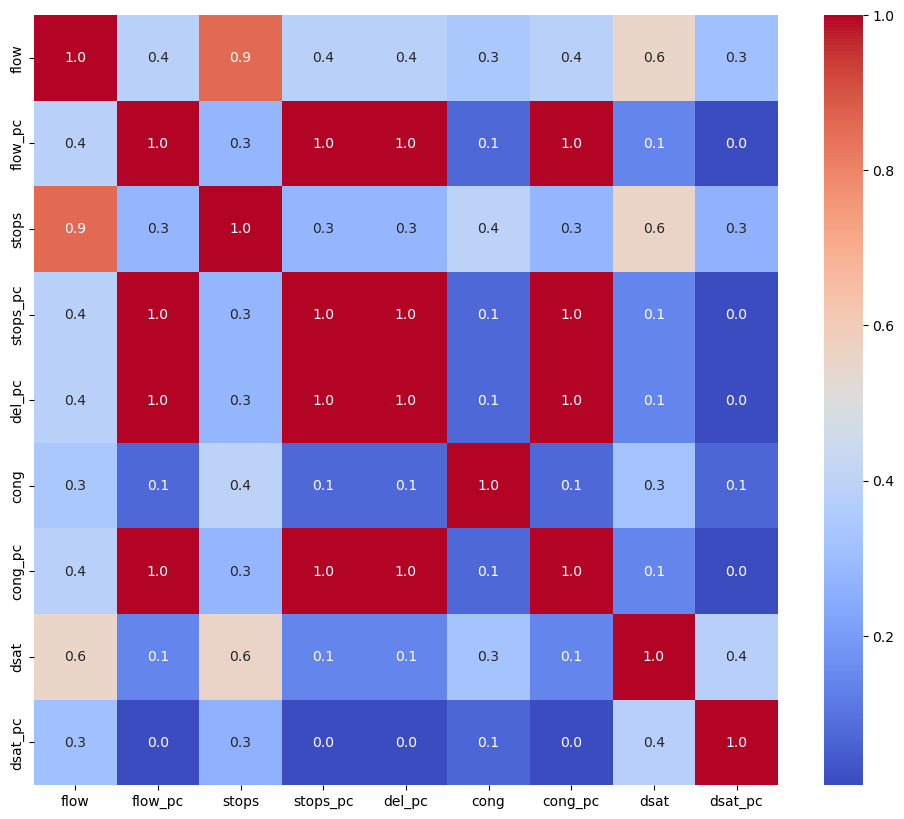

In [22]:
# Select only numerical columns (excluding ObjectId)
numeric_columns = df.select_dtypes(include='int64').drop(columns=['ObjectId'])

# Generate a correlation matrix
correlation_matrix = numeric_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")

# Show the plot
plt.show()